In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

In [2]:
data = pd.read_csv('nyc_taxi_final-1560498097450/nyc_taxi_trip_duration.csv')

In [3]:
data.shape

(729322, 11)

Data has more than 7 lakh rows and 11 columns.

In [4]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
data.sample(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
667453,id0960144,1,2016-05-23 11:50:39,2016-05-23 12:30:39,1,-73.981880,40.768471,-73.861732,40.768391,N,2400
259621,id1609812,2,2016-04-03 00:46:49,2016-04-03 01:02:05,1,-73.978706,40.728539,-73.957970,40.773560,N,916
442858,id1064861,2,2016-01-06 09:50:33,2016-01-06 09:59:01,1,-73.990952,40.750530,-73.978958,40.737049,N,508
184490,id0923807,2,2016-06-14 08:01:54,2016-06-14 08:08:18,2,-73.959389,40.771790,-73.979927,40.770950,N,384
427297,id2258728,2,2016-04-29 00:00:11,2016-04-29 00:35:20,2,-73.980087,40.754738,-73.964012,40.644077,N,2109


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [7]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)
data.dropoff_datetime = pd.to_datetime(data.dropoff_datetime)

In [10]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [11]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [12]:
data['pickup_day'] = data.pickup_datetime.dt.day
data['pickup_day_name'] = data.pickup_datetime.dt.day_name()
data['pickup_month_name'] = data.pickup_datetime.dt.month_name()
data['pickup_hour'] = data.pickup_datetime.dt.hour

data['dropoff_day'] = data.dropoff_datetime.dt.day
data['dropoff_day_name'] = data.dropoff_datetime.dt.day_name()
data['dropoff_month_name'] = data.dropoff_datetime.dt.month_name()
data['dropoff_hour'] = data.dropoff_datetime.dt.hour
    

In [13]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_day_name,pickup_month_name,pickup_hour,dropoff_day,dropoff_day_name,dropoff_month_name,dropoff_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,29,Monday,February,16,29,Monday,February,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,11,Friday,March,23,11,Friday,March,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,21,Sunday,February,17,21,Sunday,February,18
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,Tuesday,January,9,5,Tuesday,January,10
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,17,Wednesday,February,6,17,Wednesday,February,6


In [14]:
def haversine(lat1, lng1, lat2, lng2):
    """function to calculate haversine distance between two co-ordinates"""
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return(h)
data.loc[:, 'distance'] = haversine(data['pickup_latitude'], data['pickup_longitude'], data['dropoff_latitude'], data['dropoff_longitude'])


In [15]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_day_name,pickup_month_name,pickup_hour,dropoff_day,dropoff_day_name,dropoff_month_name,dropoff_hour,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,29,Monday,February,16,29,Monday,February,16,1.199073
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,11,Friday,March,23,11,Friday,March,23,4.129111
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,21,Sunday,February,17,21,Sunday,February,18,7.250753
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,Tuesday,January,9,5,Tuesday,January,10,2.361097
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,17,Wednesday,February,6,17,Wednesday,February,6,4.328534


In [16]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day                     int64
pickup_day_name               object
pickup_month_name             object
pickup_hour                    int64
dropoff_day                    int64
dropoff_day_name              object
dropoff_month_name            object
dropoff_hour                   int64
distance                     float64
dtype: object

In [17]:
data.vendor_id.value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

In [18]:
data['vendor_id'] = data['vendor_id'].astype('category')
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

In [19]:
data[['vendor_id','store_and_fwd_flag']].dtypes

vendor_id             category
store_and_fwd_flag    category
dtype: object

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

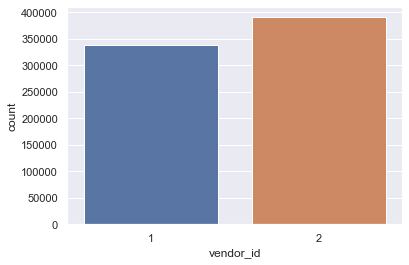

In [20]:
sns.countplot(data['vendor_id'])

<AxesSubplot:ylabel='vendor_id'>

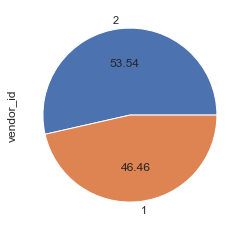

In [21]:
data['vendor_id'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='store_and_fwd_flag'>

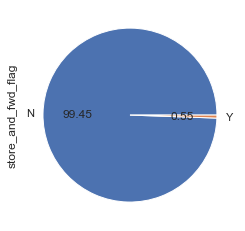

In [22]:
data['store_and_fwd_flag'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:xlabel='dropoff_day_name', ylabel='count'>

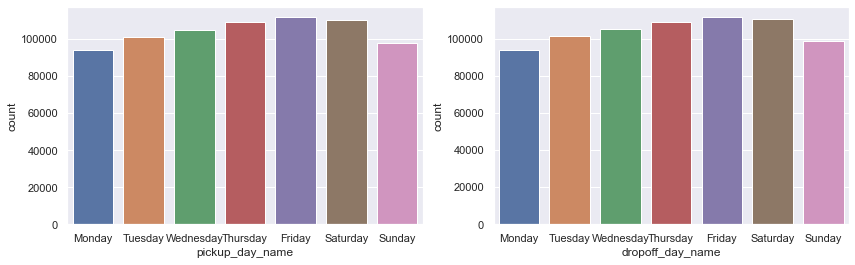

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))

sns.countplot(data['pickup_day_name'],ax=ax[0],order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

sns.countplot(data['dropoff_day_name'],ax=ax[1],order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])



([<matplotlib.patches.Wedge at 0x2610027d550>,
 [Text(-0.6874813173382036, 0.8587021825469693, ''),
  Text(0.6874813173382038, -0.8587021825469691, '')],
 [Text(-0.3749898094572019, 0.4683830086619832, '71%'),
  Text(0.37498980945720206, -0.468383008661983, '29%')])

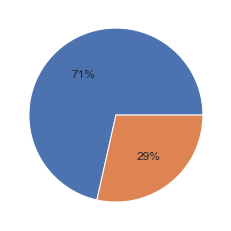

In [24]:
weekend = ['Sunday','Saturday']
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday']
data['day_type'] = data['pickup_day_name'].apply(lambda x:'weekend' if x in weekend else 'weekday')

plt.pie(data['day_type'].value_counts(),autopct='%0.0f%%')


In [25]:
# plt.pie(data['day_type'].value_counts())

<AxesSubplot:xlabel='dropoff_hour', ylabel='count'>

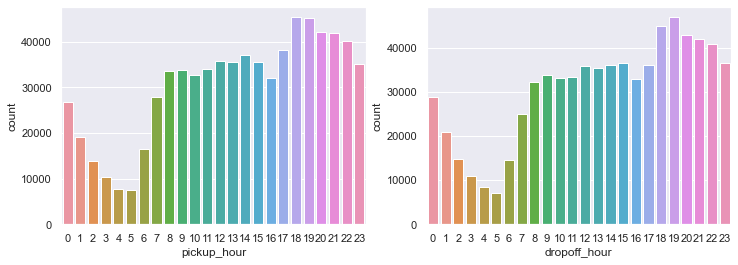

In [26]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))


sns.countplot(data['pickup_hour'],ax=ax[0])

sns.countplot(data['dropoff_hour'],ax=ax[1])




In [27]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))


# sns.countplot(data=data,ax=ax[0],x = pd.cut(data['pickup_hour'],[0,6,12,16,24]))

# sns.countplot(data['dropoff_hour'],ax=ax[1])


<AxesSubplot:xlabel='pickup_hour', ylabel='Density'>

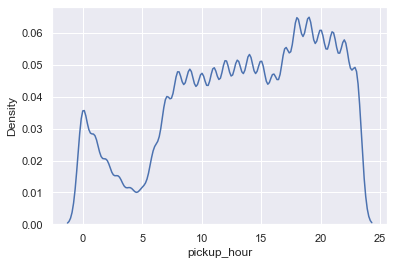

In [28]:
sns.distplot(data['pickup_hour'],hist=False)

In [29]:
def slot(x):
    
    if x >= 0 and x <= 6 :
        x = 'Night'
        
    elif x>6 and x<=12 :
        x = 'Morning'
    
    elif x>12 and x<=16 :
        x = 'Afternoon'
    else:
        x = 'Evening'
        
    return x

In [30]:
data['time_slot'] = data['pickup_hour'].apply(lambda x : slot(x))

data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_name,pickup_month_name,pickup_hour,dropoff_day,dropoff_day_name,dropoff_month_name,dropoff_hour,distance,day_type,time_slot
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,February,16,29,Monday,February,16,1.199073,weekday,Afternoon
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,March,23,11,Friday,March,23,4.129111,weekday,Evening
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,February,17,21,Sunday,February,18,7.250753,weekend,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Tuesday,January,9,5,Tuesday,January,10,2.361097,weekday,Morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,February,6,17,Wednesday,February,6,4.328534,weekday,Night


<AxesSubplot:xlabel='time_slot', ylabel='count'>

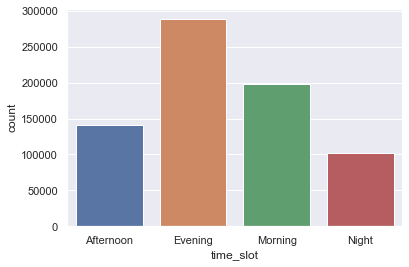

In [31]:
sns.countplot(data['time_slot'])

<AxesSubplot:xlabel='day_type', ylabel='count'>

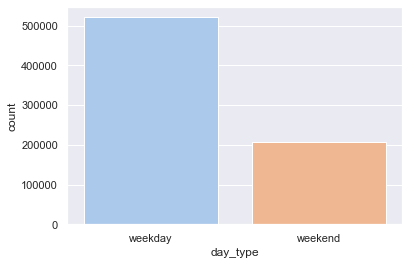

In [32]:
sns.countplot(data['day_type'],palette='pastel')

In [33]:

data['passenger_count'].describe()

count    729322.000000
mean          1.662055
std           1.312446
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: passenger_count, dtype: float64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

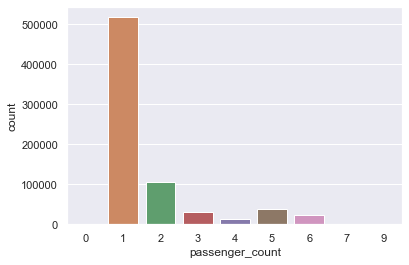

In [34]:
sns.countplot(data['passenger_count'])


<AxesSubplot:ylabel='passenger_count'>

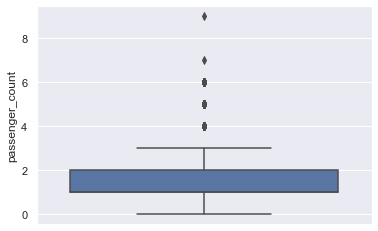

In [35]:
sns.boxplot(y=data['passenger_count'])


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

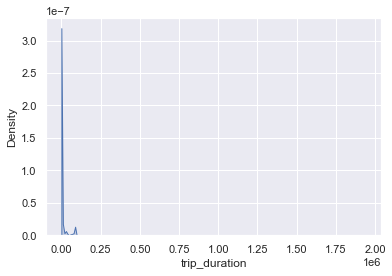

In [36]:
sns.kdeplot(data['trip_duration'],shade=True)

<AxesSubplot:xlabel='trip_duration'>

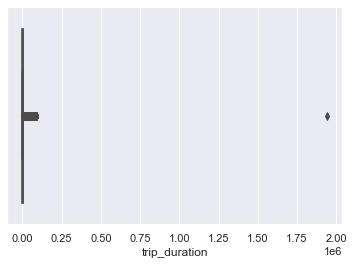

In [37]:
sns.boxplot(data['trip_duration'])

In [38]:
data['trip_duration'].skew()

186.6784368781186

In [39]:
data['trip_duration'].kurtosis()

87142.4634003971

In [40]:
data['distance'].describe()

count    729322.000000
mean          3.441139
std           4.353132
min           0.000000
25%           1.232695
50%           2.095672
75%           3.876481
max        1240.908677
Name: distance, dtype: float64

<AxesSubplot:xlabel='distance'>

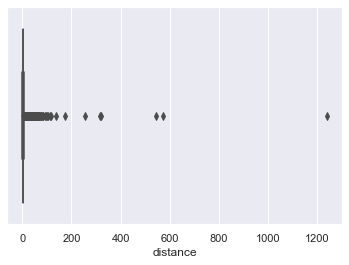

In [41]:
sns.boxplot(data['distance'],orient="v")

<AxesSubplot:xlabel='distance', ylabel='Density'>

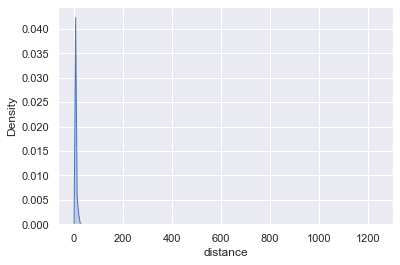

In [42]:
sns.kdeplot(data['distance'],shade=True)

In [43]:
data['distance'].skew()

40.98206468426759

In [44]:
data['distance'].kurtosis()

9795.085563470526

In [45]:
data.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
pickup_day                     int64
pickup_day_name               object
pickup_month_name             object
pickup_hour                    int64
dropoff_day                    int64
dropoff_day_name              object
dropoff_month_name            object
dropoff_hour                   int64
distance                     float64
day_type                      object
time_slot                     object
dtype: object

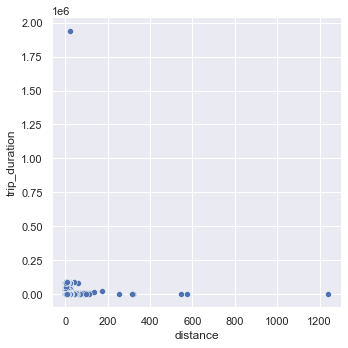

In [46]:
sns.relplot(x=data['distance'],y=data['trip_duration'],kind='scatter')

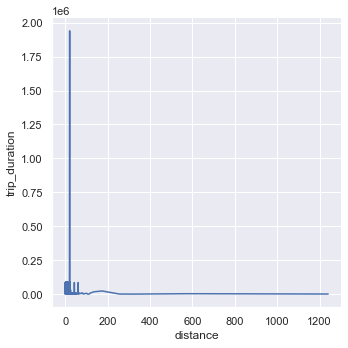

In [47]:
sns.relplot(x=data['distance'],y=data['trip_duration'],kind='line')

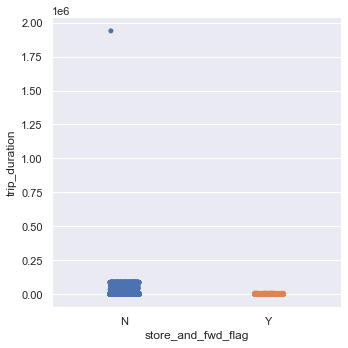

In [59]:
sns.catplot(x='store_and_fwd_flag',y='trip_duration',data=data,kind='strip')

<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

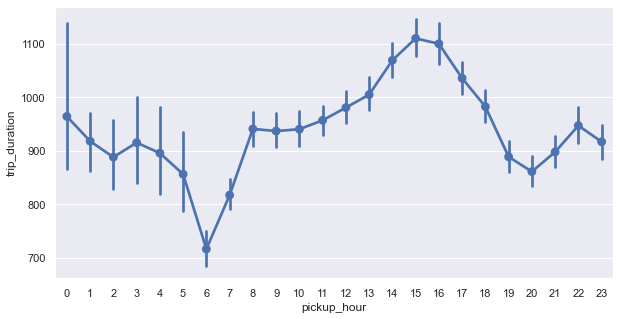

In [58]:
plt.figure(figsize=(10,5))
sns.pointplot(x='pickup_hour',y='trip_duration',data=data)

<AxesSubplot:xlabel='trip_duration', ylabel='vendor_id'>

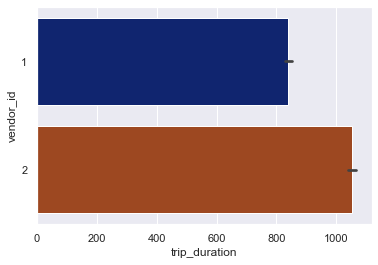

In [50]:
sns.barplot(data=data,y='vendor_id',x='trip_duration',palette='dark',estimator=np.mean)

<AxesSubplot:xlabel='passenger_count', ylabel='vendor_id'>

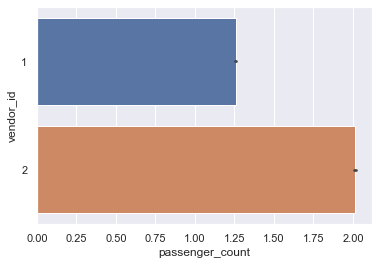

In [51]:
sns.barplot(x=data["passenger_count"],y=data['vendor_id'],estimator=np.mean)

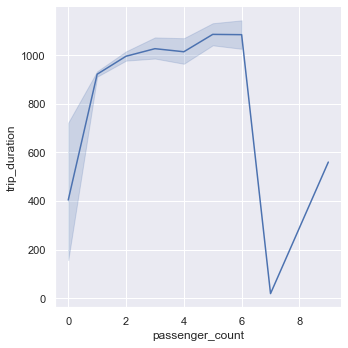

In [52]:
sns.relplot(x=data['passenger_count'],y=data['trip_duration'],kind='line')

<AxesSubplot:xlabel='day_type', ylabel='trip_duration'>

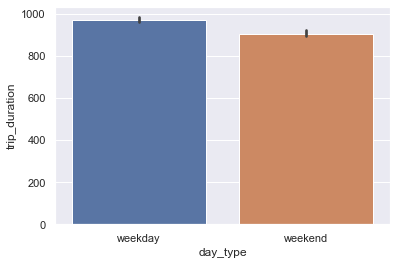

In [53]:
sns.barplot(data['day_type'],data['trip_duration'])

<AxesSubplot:xlabel='day_type', ylabel='distance'>

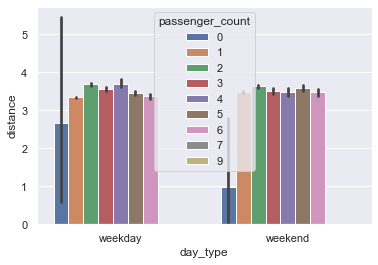

In [54]:
sns.barplot(data['day_type'],data['distance'],hue=data['passenger_count'],estimator=np.mean)

In [55]:
data.corr()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day,pickup_hour,dropoff_day,dropoff_hour,distance
passenger_count,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,0.001737,0.009851,0.001915,0.009214,0.009175
pickup_longitude,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,-0.001378,0.010754,-0.001531,0.011170,0.251482
pickup_latitude,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.006367,0.011433,-0.006369,0.018061,-0.128455
dropoff_longitude,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,-0.000294,-0.022014,-0.000378,-0.023193,0.132353
dropoff_latitude,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.006082,0.014257,-0.006109,0.018173,-0.153760
trip_duration,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,0.000999,0.002979,0.001701,0.003027,0.125772
pickup_day,0.001737,-0.001378,-0.006367,-0.000294,-0.006082,0.000999,1.000000,-0.001699,0.997913,-0.001825,0.005136
pickup_hour,0.009851,0.010754,0.011433,-0.022014,0.014257,0.002979,-0.001699,1.000000,-0.001560,0.934591,-0.016269
dropoff_day,0.001915,-0.001531,-0.006369,-0.000378,-0.006109,0.001701,0.997913,-0.001560,1.000000,-0.002035,0.004865
dropoff_hour,0.009214,0.011170,0.018061,-0.023193,0.018173,0.003027,-0.001825,0.934591,-0.002035,1.000000,-0.020934


<AxesSubplot:>

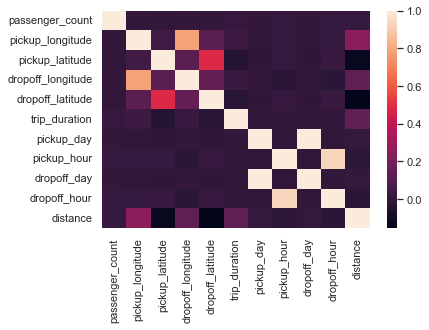

In [56]:
sns.heatmap(data.corr())